In [0]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import pandas as pd

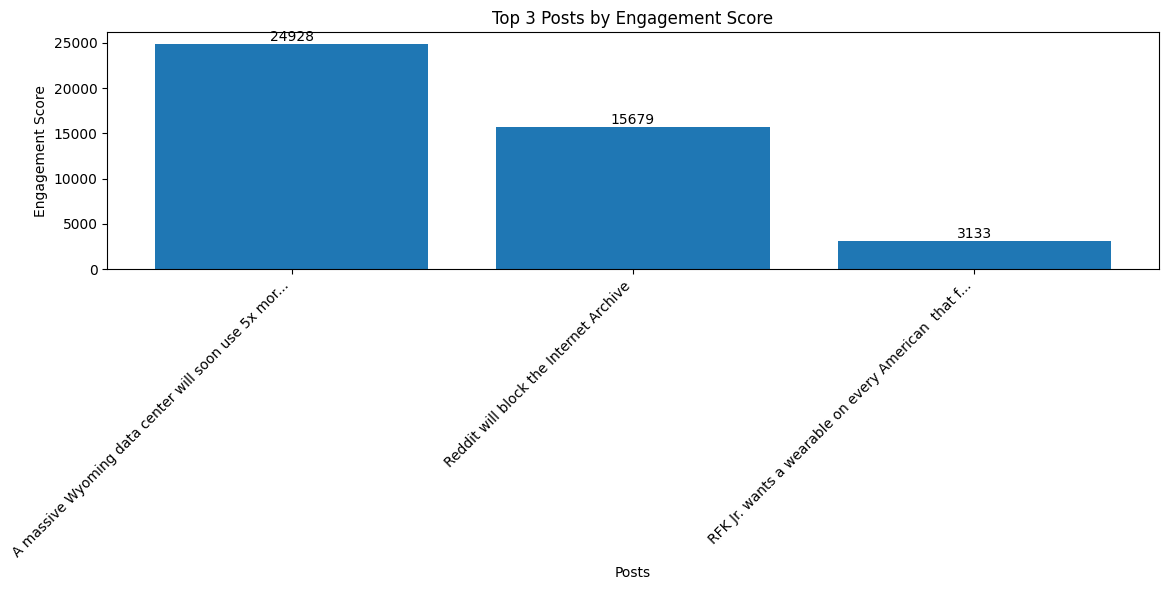

In [0]:
top_posts_pd = spark.table("workspace.default.top_posts_engagement_gold").toPandas()

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_posts_pd)), top_posts_pd['score'])

# Customize the chart
plt.title('Top 3 Posts by Engagement Score')
plt.xlabel('Posts')
plt.ylabel('Engagement Score')
plt.xticks(range(len(top_posts_pd)), 
           [title[:50] + '...' if len(title) > 50 else title for title in top_posts_pd['title']], 
           rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [0]:
import plotly.express as px

correlation_data = spark.table("workspace.default.post_comments_correlation_gold").toPandas()

fig = px.scatter(correlation_data,
                x='post_score',
                y='avg_comment_score', 
                size='total_comments',
                hover_data=['post_title', 'post_author'],
                title='Post Score vs Average Comment Score Correlation',
                labels={
                    'post_score': 'Post Score', 
                    'avg_comment_score': 'Average Comment Score',
                    'total_comments': 'Number of Comments'
                })

fig.update_traces(marker=dict(opacity=0.7))
fig.add_scatter(x=correlation_data['post_score'], 
                y=correlation_data['avg_comment_score'],
                mode='lines',
                name='Trend Line')

fig.show()

In [0]:
commenters_df = spark.table("workspace.default.top_commenters_gold").limit(5).toPandas()

top_commenters_sidebar = commenters_df.head(20)[['author', 'total_comment_score']].copy()
top_commenters_sidebar['rank'] = range(1, len(top_commenters_sidebar) + 1)

fig_sidebar = px.bar(
    top_commenters_sidebar,
    y='author',
    x='total_comment_score',
    orientation='h',
    title='Top 5 Commenters',
    labels={'total_comment_score': 'Total Comment Score', 'author': 'Author'},
    text='total_comment_score',
    color='total_comment_score',
    color_continuous_scale='Blues'
)
fig_sidebar.update_traces(
    texttemplate='%{text:,}',
    textposition='inside'
)

fig_sidebar.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    height=800,
    width=600,
    margin=dict(l=150, r=50, t=50, b=50)
)

fig_sidebar.show()